In [ ]:
# Author  :  gsanchz
# Date    :  12/2023

# Predicción de fugas de clientes en una compañía telefónica

Quiero desarrollar un modelo que prediga los **100 clientes actuales** (dataset de explotación) que tienen más probabilidad de abandonar una compañía telecom. La fuente de datos es **fuga_clientes_empresa_telefonica_construccion.csv**.

Los campos de esta base de datos son:

* **Customer ID**

* **network_age**: antigüedad del cliente en días

* **Customer tenure in months:** antigüedad del cliente en meses

* **Total Spend in Months 1 and 2:** gasto total del cliente en los meses de referencia 1 y 2

* **Total SMS Spend:** gasto total en SMS

* **Total Data Spend:** gasto total en datos/internet

* **Total Data Consumption:** consumo total de datos (en KB) durante el período de estudio

* **Total Unique Calls:** número total de llamadas únicas

* **Total Onnet spend:** gasto total en llamadas a otros usuarios de la misma red de telefonía

* **Total Offnet spend:** gasto total en llamadas a otros usuarios de redes de telefonía diferentes

* **Total Call centre complaint calls:** número de llamadas de queja al call center

* **Network type subscription in Month 1:** suscripción de tipo de red en el mes 1. Esto indica la suscripción de red preferida de un cliente, lo que puede indicar su tipo de dispositivo: servicio 2G o 3G

* **Network type subscription in Month 2:** igual que el anterior pero en el mes posterior

* **Churn Status**: el valor es 1 si el cliente abandona la compañía telefónica, 0 si permanece en ella

* **Most Loved Competitor network in Month 1:** qué otro proveedor de la competencia prefiere el cliente en el mes 1. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

* **Most Loved Competitor network in Month 2:** qué otro proveedor de la competencia prefiere el cliente en el mes 2. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

La variable a predecir es **Churn Status**: el valor es 1 si el cliente **abandona** la compañía, 0 si no la abandona.

También contamos con **fuga_clientes_empresa_telefonica_explotacion.csv**, con información sobre clientes de los que no se sabe ahora mismo si van a permanecer o no en la compañía. Por tanto en esta segunda base de datos todos los valores de la columna **Churn Status** son missing values (NaN).

El entregable solicitado por la compañía es un archivo csv con una sola columna, **Customer ID**, y 100 filas que contengan los IDs de los clientes seleccionados.

In [1]:
import pandas as pd

In [2]:
datos_construccion = pd.read_csv("./datasets/fuga_clientes_empresa_telefonica_construccion.csv")
datos_explotacion  = pd.read_csv("./datasets/fuga_clientes_empresa_telefonica_explotacion.csv")

In [3]:
datos_construccion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [4]:
datos_explotacion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [5]:
# chequeo de que las columnas son exactamente las mismas en los dos ficheros:
sum(datos_construccion.columns != datos_explotacion.columns)

0

In [6]:
# la columna a predecir es "Churn Status"
# si es 1, el cliente se va de la compañía
# si es 0, el cliente se queda

# Esta columna se sabe en el dataset de construcción (ejemplos de clientes pasados):
datos_construccion["Churn Status"].values[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [7]:
# Sin embargo no se sabe en el dataset de explotación (clientes actuales):
datos_explotacion["Churn Status"].values[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [8]:
df = datos_construccion
df

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,...,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,...,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,...,0,0,1,0,1,0,0,0,0,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,...,0,0,0,0,1,0,0,0,0,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,ADF1290,3994,133.13,804.0848,7.00,0.00,2364.6768,127,30071,8091,...,0,0,0,0,0,0,0,1,0,0
1106,ADF1302,731,24.37,828.7404,3.52,2.50,35674.9864,660,10912,20756,...,0,0,0,0,0,0,0,1,0,0
1107,ADF1304,2971,99.03,832.7248,9.62,2.50,103008.5605,224,37401,29553,...,1,0,0,0,0,0,0,1,0,0
1108,ADF1308,595,19.83,839.5724,73.80,8.75,229.4463,102,21304,7894,...,0,1,0,0,0,0,0,1,0,0


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

outliers_in_col = {}
for col in [col for col in df.columns if (df[col].dtype == 'int64') or (df[col].dtype == 'float64')]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = (df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)
    outliers_in_col[col] = {}
    outliers_in_col[col]['iqr'] = iqr
    outliers_in_col[col]['n_outliers'] = outliers.sum()
    outliers_in_col[col]['outliers'] = outliers
    
u = np.zeros(1110)
for outlier in outliers_in_col.values():
    u += outlier['outliers']

#Quito aquellos registros que tengan un número inusual de outliers en cada uno de sus campos
q1u = u.quantile(0.25)
q3u = u.quantile(0.75)
iqru = q3u - q1u
mask = (u > q1u - 1.5*iqru)&(u < q3u + 1.5*iqru)
df_no_outliers = df[mask]
df_no_outliers

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,...,0,1,0,0,1,0,0,0,0,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,...,0,1,0,0,1,0,0,0,0,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,...,0,0,1,0,1,0,0,0,0,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,...,0,0,0,0,1,0,0,0,0,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,ADF1290,3994,133.13,804.0848,7.00,0.00,2364.6768,127,30071,8091,...,0,0,0,0,0,0,0,1,0,0
1106,ADF1302,731,24.37,828.7404,3.52,2.50,35674.9864,660,10912,20756,...,0,0,0,0,0,0,0,1,0,0
1107,ADF1304,2971,99.03,832.7248,9.62,2.50,103008.5605,224,37401,29553,...,1,0,0,0,0,0,0,1,0,0
1108,ADF1308,595,19.83,839.5724,73.80,8.75,229.4463,102,21304,7894,...,0,1,0,0,0,0,0,1,0,0


In [10]:
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

df_no_label = df_no_outliers.drop('Churn Status',axis=1).set_index('Customer ID')
df_no_label.var()

network_age                                          1.610054e+06
Customer tenure in month                             1.788938e+03
Total Spend in Months 1 and 2                        5.125797e+05
Total SMS Spend                                      2.242426e+03
Total Data Spend                                     1.282566e+04
Total Data Consumption                               4.817384e+13
Total Unique Calls                                   6.965602e+04
Total Onnet spend                                    9.621805e+07
Total Offnet spend                                   6.446667e+08
Total Call centre complaint calls                    6.161383e+00
Most Loved Competitor network in Month 1_0           2.536872e-02
Most Loved Competitor network in Month 1_Mango       1.305957e-01
Most Loved Competitor network in Month 1_PQza        1.872084e-01
Most Loved Competitor network in Month 1_ToCall      1.234158e-01
Most Loved Competitor network in Month 1_Uxaa        1.729429e-01
Most Loved

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Customer ID,,,,,,,,,,,,,,,,,,,,,
ADF0039,-1.750956,0.888627,-1.558854,-1.889339,1.459471,-0.653771,-0.263513,0.234050,-0.536286,0.162970,...,-1.220727,-0.321187,-0.184260,-0.640884,-0.427423,-0.477760,-0.058183,6.115084e-07,-2.043865e-16,-4.715655e-16
ADF0041,-1.213800,-0.024430,-1.002416,-2.042942,1.522047,-0.627168,-0.267286,0.624275,-0.874500,0.202908,...,-1.123637,-0.101390,0.154394,-0.579939,-0.283094,-0.557975,-0.036414,-5.784108e-05,-4.264311e-16,-6.936101e-16
ADF0051,0.313143,-0.251454,0.923969,-2.847550,1.386310,-0.757785,-1.573387,-0.982968,1.351228,0.763836,...,-0.328304,1.095701,0.982100,-0.131356,0.567247,-0.207742,-0.117421,5.413508e-06,-1.092565e-15,-1.137699e-15
ADF0059,-0.278896,0.391140,0.414179,-1.938030,0.785077,-0.201692,1.386487,1.161918,0.869549,5.520966,...,-2.386466,0.356628,-0.339456,0.039789,-0.734546,-0.406661,-0.122234,-1.050419e-05,-2.043865e-16,1.082747e-15
ADF0060,0.012744,-0.034343,0.964692,-2.469706,1.664204,-0.227144,-1.234655,-0.325212,1.808249,0.599754,...,-0.307025,1.517407,0.416374,-0.091656,0.302337,-0.355875,-0.047835,2.567305e-06,-8.705203e-16,-1.026677e-15


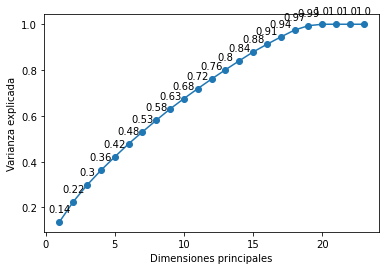

In [11]:
# Análisis de componentes principales para la reducción de la dimensionalidad
# Fuente: Machine Learning Aplicado Usando Python. Editorial: Ideas Propias

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_no_label)
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.explained_variance_ratio_
cumsum = np.cumsum(modelo_pca.explained_variance_ratio_)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df_no_label.columns)) + 1,cumsum, marker = 'o')
plt.xlabel("Dimensiones principales")
plt.ylabel("Varianza explicada")
for x, y in zip(np.arange(len(df_no_label.columns)) + 1, cumsum):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
proyecciones = pca_pipe.transform(X=df_no_label)
proyecciones = pd.DataFrame(proyecciones,index = df_no_label.index)
proyecciones.head()

### 18 variables son suficientes para conservar la información de la varianza

In [12]:
loadings = modelo_pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df_no_label.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
network_age,0.277813,-0.518024,0.275346,-0.080089,0.071005,0.028823,-0.025047,0.175449,-0.099051,0.024234,...,0.000413,0.054042,0.121955,-0.014311,0.031558,0.017161,0.001767,7.071066e-01,3.325775e-12,6.021770e-13
Customer tenure in month,0.277812,-0.518025,0.275347,-0.080088,0.071004,0.028823,-0.025049,0.175447,-0.099049,0.024232,...,0.000415,0.054039,0.121957,-0.014309,0.031558,0.017161,0.001755,-7.071069e-01,-3.325794e-12,-6.021998e-13
Total Spend in Months 1 and 2,0.424903,0.297226,0.206318,0.173520,0.012045,0.037145,0.081133,0.058424,0.020046,-0.056034,...,-0.036021,-0.045040,-0.113678,0.068682,-0.000928,-0.044908,0.778051,-6.503310e-06,1.944079e-16,-1.681771e-16
Total SMS Spend,0.058844,0.274176,0.106699,0.091276,0.107896,-0.311529,-0.070676,0.135088,-0.267568,0.123578,...,0.171991,0.201959,0.369015,0.250537,-0.481886,-0.124764,-0.085497,4.108090e-07,-1.721049e-16,-1.979716e-16
Total Data Spend,0.116160,0.200134,0.162117,0.252787,0.139256,0.192972,0.192593,0.347798,0.166582,-0.056557,...,0.006392,0.259980,-0.309881,-0.109728,0.146431,-0.024351,-0.358697,1.327866e-06,2.009154e-16,1.419465e-16
Total Data Consumption,-0.024273,0.105446,-0.010060,0.138561,0.121596,0.341172,0.257113,0.199724,0.356828,-0.293412,...,-0.136445,-0.033022,0.620957,0.123811,-0.014871,-0.021339,-0.079430,2.293080e-06,1.496964e-16,2.627220e-16
Total Unique Calls,0.400159,0.032258,0.108578,0.071998,-0.116712,-0.018836,0.011190,-0.257398,0.000400,-0.162472,...,-0.040383,-0.202068,-0.185363,0.137575,-0.125961,-0.647757,-0.357831,4.528874e-06,-2.275202e-18,-8.680604e-17
Total Onnet spend,0.239646,0.200952,-0.073444,0.105390,-0.060548,-0.256666,0.037146,-0.132094,-0.162509,0.218841,...,-0.013653,0.157138,0.356092,-0.298648,0.665499,-0.116640,-0.084865,-4.605957e-07,2.034172e-17,2.094841e-17
Total Offnet spend,0.295824,0.300729,0.279396,-0.078160,-0.016445,-0.121035,-0.104451,-0.042237,-0.108852,-0.098692,...,0.000703,-0.232959,-0.048457,0.058601,-0.036150,0.654687,-0.330329,4.306145e-06,-9.058552e-17,1.444389e-16
Total Call centre complaint calls,0.063961,-0.072194,-0.118334,0.093088,0.173248,-0.043416,-0.084527,-0.173984,0.298295,0.095117,...,-0.213146,-0.188848,-0.116946,-0.233451,-0.144792,0.007800,-0.005363,-4.452524e-08,1.991216e-17,2.687343e-16


C:\Users\guill\AppData\Local\Temp\ipykernel_16696\771159921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_outliers.corr(),vmax=1,vmin=-1,cmap='coolwarm_r')


<AxesSubplot:>

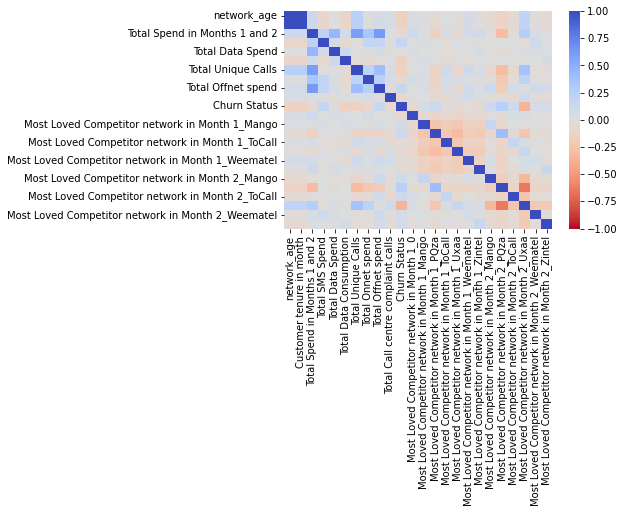

In [13]:
sns.heatmap(df_no_outliers.corr(),vmax=1,vmin=-1,cmap='coolwarm_r')

In [14]:
#Escogemos las 18 primeras CP y vemos cuáles variables contribuyen más a su construcción
loadings_df = loadings_df.iloc[:,:17]
neg_corr = loadings_df[loadings_df<0].fillna(0).apply(sum,axis=1).sort_values()
pos_corr = loadings_df[loadings_df>0].fillna(0).apply(sum,axis=1).sort_values()
pd.DataFrame({'pos_corr':pos_corr,'neg_corr':neg_corr,'corr_abs_sum':pos_corr+abs(neg_corr)}).sort_values(['corr_abs_sum'])

,pos_corr,neg_corr,corr_abs_sum
Total Spend in Months 1 and 2,1.548645,-0.250774,1.799418
Customer tenure in month,1.133854,-0.736520,1.870374
network_age,1.133855,-0.736523,1.870379
Total Unique Calls,0.855072,-1.205042,2.060114
Most Loved Competitor network in Month 2_Uxaa,1.026166,-1.201095,2.227261
Most Loved Competitor network in Month 2_PQza,1.324598,-0.914464,2.239062
Total Offnet spend,1.284496,-1.014135,2.298631
Total Onnet spend,1.437815,-1.076750,2.514565
Most Loved Competitor network in Month 1_ToCall,0.858336,-1.669887,2.528224
Most Loved Competitor network in Month 1_0,1.774504,-0.757377,2.531881


Eliminamos "Customer tenure in month", "network age", "Total Spend in Months 1 and 2", "Most Loved Competitor network in Month 2_Uxaa", "Total Offnet Spend"

In [15]:
cols_to_drop = ["Customer tenure in month", "network_age","Total Onnet spend",\
                "Most Loved Competitor network in Month 2_PQza", "Total Offnet spend", "Total Unique Calls"]
df_no_outliers = df_no_outliers.drop(cols_to_drop, axis = 1).set_index('Customer ID')
df_no_outliers

,Total Spend in Months 1 and 2,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Call centre complaint calls,Churn Status,Most Loved Competitor network in Month 1_0,Most Loved Competitor network in Month 1_Mango,Most Loved Competitor network in Month 1_PQza,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
Customer ID,,,,,,,,,,,,,,,,,,
ADF0039,76.7140,0.00,1.25,1.4951,2,0,0,0,0,0,1,0,0,1,0,0,0,0
ADF0041,98.8904,4.14,1.25,1.0244,1,0,0,0,0,0,1,0,0,1,0,0,0,0
ADF0051,372.6300,3.51,1.25,6.0898,1,0,0,0,0,0,0,1,0,1,0,0,0,0
ADF0059,530.2000,6.85,1.25,3.3447,1,0,1,0,0,0,0,0,0,1,0,0,0,0
ADF0060,554.1300,6.99,153.75,673204.0342,1,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADF1290,804.0848,7.00,0.00,2364.6768,2,0,0,0,1,0,0,0,0,0,0,1,0,0
ADF1302,828.7404,3.52,2.50,35674.9864,7,0,0,0,1,0,0,0,0,0,0,1,0,0
ADF1304,832.7248,9.62,2.50,103008.5605,3,0,0,0,0,1,0,0,0,0,0,1,0,0


<AxesSubplot:>

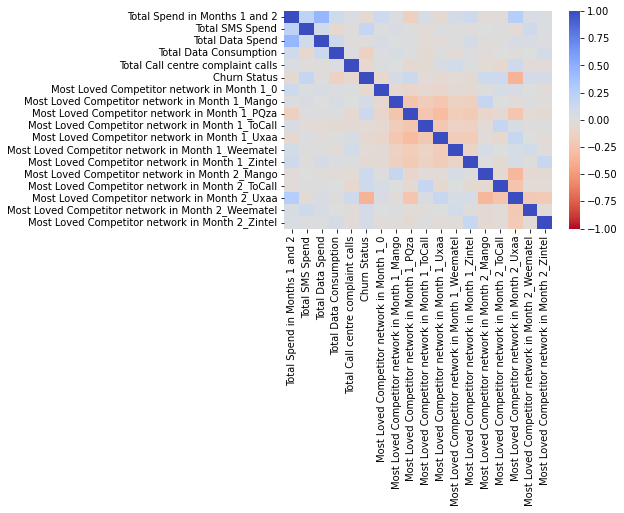

In [16]:
sns.heatmap(df_no_outliers.corr(),vmax=1,vmin=-1,cmap='coolwarm_r')

In [17]:
clas_col = 'Churn Status'
no_clas_cols = [col for col in df_no_outliers.columns if col != clas_col]

X = df_no_outliers[no_clas_cols].values
y = df_no_outliers[clas_col].values

In [18]:
X

array([[ 76.714 ,   0.    ,   1.25  , ...,   0.    ,   0.    ,   0.    ],
       [ 98.8904,   4.14  ,   1.25  , ...,   0.    ,   0.    ,   0.    ],
       [372.63  ,   3.51  ,   1.25  , ...,   0.    ,   0.    ,   0.    ],
       ...,
       [832.7248,   9.62  ,   2.5   , ...,   1.    ,   0.    ,   0.    ],
       [839.5724,  73.8   ,   8.75  , ...,   1.    ,   0.    ,   0.    ],
       [843.0604,  23.1   ,  13.75  , ...,   1.    ,   0.    ,   0.    ]])

In [19]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.7

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [20]:
# DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

scores = ["precision", "recall"]
tuned_parameters_tree = [
    {"max_depth": [3,4,5], "min_samples_split": np.arange(2,15,1), "max_features": np.arange(7,13,1),\
     "min_samples_leaf":np.arange(20,50,2)}
]

grid_search = GridSearchCV(
    DecisionTreeClassifier() , tuned_parameters_tree, scoring=scores, refit=refit_strategy
)
grid_search.fit(X, y)

All grid-search results:
precision: 0.813 (±0.143), recall: 0.628 (±0.287), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 2}
precision: 0.760 (±0.141), recall: 0.557 (±0.263), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 3}
precision: 0.734 (±0.125), recall: 0.563 (±0.257), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 4}
precision: 0.730 (±0.062), recall: 0.617 (±0.298), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 5}
precision: 0.828 (±0.138), recall: 0.563 (±0.300), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 6}
precision: 0.745 (±0.153), recall: 0.680 (±0.168), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 7}
precision: 0.818 (±0.099), recall: 0.645 (±0.166), for {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 20, 'min_samples_split': 8}
pr

precision: 0.792 (±0.149), recall: 0.671 (±0.299), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 24, 'min_samples_split': 12}
precision: 0.827 (±0.150), recall: 0.644 (±0.294), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 24, 'min_samples_split': 13}
precision: 0.797 (±0.173), recall: 0.609 (±0.271), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 24, 'min_samples_split': 14}
precision: 0.784 (±0.119), recall: 0.607 (±0.262), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 26, 'min_samples_split': 2}
precision: 0.760 (±0.113), recall: 0.701 (±0.141), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 26, 'min_samples_split': 3}
precision: 0.719 (±0.100), recall: 0.680 (±0.202), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 26, 'min_samples_split': 4}
precision: 0.761 (±0.134), recall: 0.530 (±0.232), for {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 26, 'min_samples_split': 5}
precision: 0.837 (±0.136

precision: 0.729 (±0.123), recall: 0.609 (±0.277), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 32, 'min_samples_split': 11}
precision: 0.846 (±0.137), recall: 0.559 (±0.258), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 32, 'min_samples_split': 12}
precision: 0.763 (±0.130), recall: 0.619 (±0.279), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 32, 'min_samples_split': 13}
precision: 0.715 (±0.165), recall: 0.538 (±0.254), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 32, 'min_samples_split': 14}
precision: 0.829 (±0.127), recall: 0.640 (±0.311), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 34, 'min_samples_split': 2}
precision: 0.736 (±0.156), recall: 0.600 (±0.166), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 34, 'min_samples_split': 3}
precision: 0.747 (±0.112), recall: 0.731 (±0.159), for {'max_depth': 3, 'max_features': 11, 'min_samples_leaf': 34, 'min_samples_split': 4}
precision: 0.810

precision: 0.790 (±0.175), recall: 0.669 (±0.310), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 32, 'min_samples_split': 10}
precision: 0.752 (±0.145), recall: 0.734 (±0.205), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 32, 'min_samples_split': 11}
precision: 0.826 (±0.148), recall: 0.634 (±0.288), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 32, 'min_samples_split': 12}
precision: 0.843 (±0.133), recall: 0.592 (±0.263), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 32, 'min_samples_split': 13}
precision: 0.813 (±0.128), recall: 0.692 (±0.308), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 32, 'min_samples_split': 14}
precision: 0.796 (±0.177), recall: 0.627 (±0.279), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 34, 'min_samples_split': 2}
precision: 0.756 (±0.141), recall: 0.767 (±0.117), for {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 34, 'min_samples_split': 3}
precision: 0.80

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 4, 5],
                          'max_features': array([ 7,  8,  9, 10, 11, 12]),
                          'min_samples_leaf': array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]),
                          'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             refit=<function refit_strategy at 0x0000026E8ED77550>,
             scoring=['precision', 'recall'])

In [24]:
tree = DecisionTreeClassifier(max_depth= 3, max_features= 7, min_samples_leaf = 22, min_samples_split = 12).fit(X,y)
tree

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_leaf=22,
                       min_samples_split=12)

In [25]:
X_predict = datos_explotacion.drop(['Churn Status']+cols_to_drop,axis=1).set_index('Customer ID')
X_predict

,Total Spend in Months 1 and 2,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Call centre complaint calls,Most Loved Competitor network in Month 1_0,Most Loved Competitor network in Month 1_Mango,Most Loved Competitor network in Month 1_PQza,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
Customer ID,,,,,,,,,,,,,,,,,
ADF1330,878.6500,8.76,47.50,115805.2080,1,0,0,0,0,0,1,0,0,0,1,0,0
ADF1331,878.7200,294.00,6.25,696816.2705,3,0,1,0,0,0,0,0,0,0,1,0,0
ADF1345,898.4900,15.75,0.00,464885.6963,2,0,0,1,0,0,0,0,0,0,1,0,0
ADF1349,904.3220,155.66,80.00,799300.8506,1,0,0,0,0,1,0,0,0,0,1,0,0
ADF1363,920.1420,0.00,0.00,47665.3779,2,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADF1956,270.3344,6.58,2.50,7410.7529,1,0,0,1,0,0,0,0,0,0,0,0,1
ADF1965,1024.8460,111.99,10.00,493671.9863,2,0,1,0,0,0,0,0,0,0,0,0,1
ADF1967,1143.4972,19.84,13.75,261.9307,3,0,0,0,0,0,0,1,0,0,0,0,1


In [45]:
users = []
si_cambian = []
for (user,[no,si]) in zip(X_predict.index,tree.predict_proba(X_predict)):
    users += [user]
    si_cambian += [si]
df_si = pd.DataFrame({'Customer ID':users,'p':si_cambian}).sort_values('p').set_index('Customer ID')
mayor_prob = df_si[-100:]
mayor_prob

C:\Users\guill\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,p
Customer ID,
ADF1995,0.652672
ADF1400,0.652672
ADF1426,0.652672
ADF1723,0.652672
ADF0333,0.652672
...,...
ADF1581,0.926316
ADF0490,0.926316
ADF0420,0.926316


In [48]:
pd.Series(mayor_prob.index)

0     ADF1995
1     ADF1400
2     ADF1426
3     ADF1723
4     ADF0333
       ...   
95    ADF1581
96    ADF0490
97    ADF0420
98    ADF1613
99    ADF0458
Name: Customer ID, Length: 100, dtype: object